In [1]:
'''
Preprocess the sky and star targets for the fiber assignment.
'''
from utils.common_imports import np, time, plt, fits, Table, new_colors
from utils.io import plot_radec, write_data_table
import pandas as pd
from astropy.table import Column
from astropy.io import ascii

# TO-DO: def data_check() - check the data using plots and functions

# basice functions

In [2]:
def get_data_table(id, ra, dec, prefix, exptime = 900.0):
    '''
    Get the data table of the sky or star targets.
    '''
    if prefix is None:
        raise ValueError('Give prefix of data file!')
    
    # Create the data table
    id_list = ['_Sky_'+str(x) for x in id] if prefix == 'sky' else ['_Star_'+str(x) for x in id]
    data_table = Table(
        [
            np.array(id_list),  # ID
            np.array(ra, dtype='float64'),  # R.A.
            np.array(dec, dtype='float64'),  # Dec.
            np.zeros(len(ra), dtype='float64') + exptime,  # Exposure Time
            np.zeros(len(ra), dtype='int32'),  # stage
        ],
        names=(
            'ID', 'R.A.', 'Dec.', 'Exposure Time', 'stage'
        )
    )

    return data_table
    

def read_star_data(data_dir, region_id):
    '''
    Read the star data of a specific region.
    '''

    print(data_dir + f'/sky_star_data/region{region_id}_probfstar.csv')

    df_star = pd.read_csv(data_dir + f'/sky_star_data/region{region_id}_probfstar.csv') 

    return df_star


def read_sky_data(data_dir, region_id, split_id):
    '''
    Read the sky data of a specific region.
    '''
    df_sky = pd.read_feather(data_dir + f'/sky_star_data/sky_region{region_id}-0000{split_id}.feather')

    return df_sky





In [4]:
# preprocess sky and star data
calib_data_dir = '/Users/jing/My_Work/Ongoing/NetFlow_PFS_Cosmo/Data/'

# Calibration targets for testing

In [3]:
# TO-DO: revise the ra, dec region selection code
id_sky_test = np.array([])
ra_sky_test = np.array([])
dec_sky_test = np.array([])

# region 3 of sky data
t0 = time.time()

fig, ax= plt.subplots(1, 1, figsize=(6, 8))
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")
ax.set_title("Sky Region 3")

for i in range(4)[:2]:
    df_sky = read_sky_data(calib_data_dir, 3, i)
    if i == 0: print(df_sky.columns)
    
    # TO-DO: make sure sky_id is unique among all datasets
    id_sky = df_sky['sky_id']
    ra_sky = df_sky['ra']
    dec_sky = df_sky['dec']

    # mask if there is any
    msk = np.ones(len(id_sky), dtype=bool)
    # print the ra, dec range
    print("%f<ra<%f, %f<dec<%f." % (np.min(ra_sky), np.max(ra_sky), np.min(dec_sky), np.max(dec_sky)))
    msk_test = (ra_sky > 330) & (ra_sky < 350) & (dec_sky > -1.5) & (dec_sky < 0.5)

    # get the data table
    #data_table_sky = get_data_table(id_sky[msk], ra_sky[msk], dec_sky[msk], prefix='sky', exptime=900.0)

    # write the data
    #write_data(data_table_sky, prefix=f'sky_region3_0000{i}', fmt='fits')
    #write_data(data_table_sky, prefix=f'sky_region3_0000{i}', fmt='ecsv')
    
    # plot the data
    ax.plot(ra_sky, dec_sky, ",", alpha=1., ls='none')

    # for test run
    id_sky_test = np.append(id_sky_test, id_sky[msk_test])
    ra_sky_test = np.append(ra_sky_test, ra_sky[msk_test])
    dec_sky_test = np.append(dec_sky_test, dec_sky[msk_test])
    

fig.savefig("../output/figures/" + "sky_region3" + "_radec.png")
plt.close(fig)

t1 = time.time()
print(f'Time taken - read sky data: {t1-t0:.2f} seconds')


Index(['sky_id', 'obj_id', 'obj_id_orig', 'ra', 'dec', 'epoch', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'mag_thresh', 'version',
       'created_at', 'updated_at'],
      dtype='object')
328.803740<ra<348.803739, -8.112674<dec<8.499279.
0.000002<ra<359.999998, -8.112730<dec<8.499093.
Time taken - read sky data: 10.98 seconds


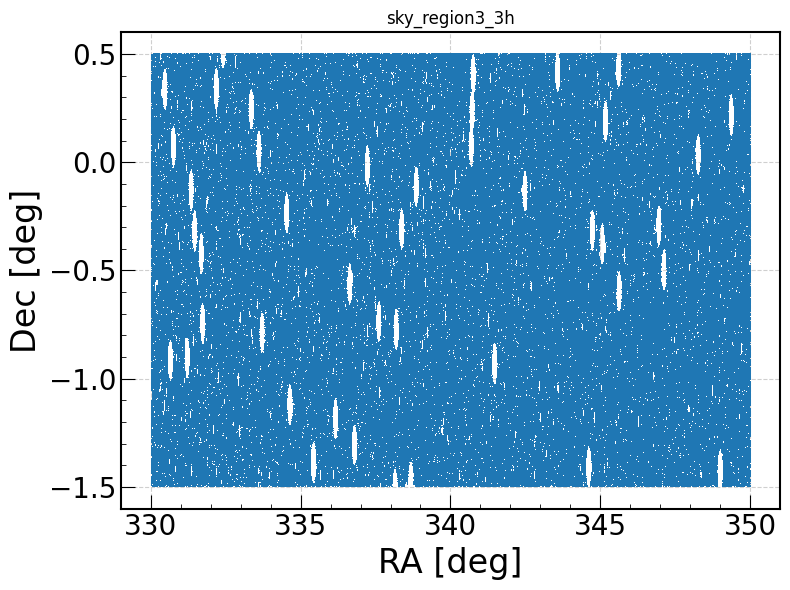

In [4]:
# for test run
data_table_sky_test = get_data_table(id_sky_test, ra_sky_test, dec_sky_test, prefix='sky')

write_data(data_table_sky_test, prefix=f'sky_region3_3h', fmt='ecsv', output_dir="../data_proc/test/")

plot_radec(data_table_sky_test, title="sky_region3_3h", output_dir='../output/figures/')

/Users/jing/My_Work/Ongoing/NetFlow_PFS_Cosmo/Data//sky_star_data/region3_probfstar.csv
Index(['obj_id', 'catalog', 'ra', 'dec', 'epoch', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'gPS1', 'rPS1', 'iPS1',
       'zPS1', 'yPS1', 'gFluxJy', 'rFluxJy', 'iFluxJy', 'zFluxJy', 'yFluxJy',
       'gFluxJy_err', 'rFluxJy_err', 'iFluxJy_err', 'zFluxJy_err',
       'yFluxJy_err', 'flags_dist', 'flags_ebv', 'probfstar'],
      dtype='object')
Time taken - read star data: 15.24 seconds
epoch
parallax
parallax_error
pmra
pmra_error
pmdec
pmdec_error
gPS1
rPS1
iPS1
zPS1
yPS1
gFluxJy
rFluxJy
iFluxJy
zFluxJy
yFluxJy
gFluxJy_err
rFluxJy_err
iFluxJy_err
zFluxJy_err
yFluxJy_err
flags_dist
flags_ebv
probfstar
pmra has nan: True, pmdec has nan: True
pmra: -160.18954609782926 - 133.36478456218288, pmdec: -129.668872572441 - 24.357855542342428
Time taken - get star table: 0.18 seconds
Time taken - save star table: 0.83 seconds


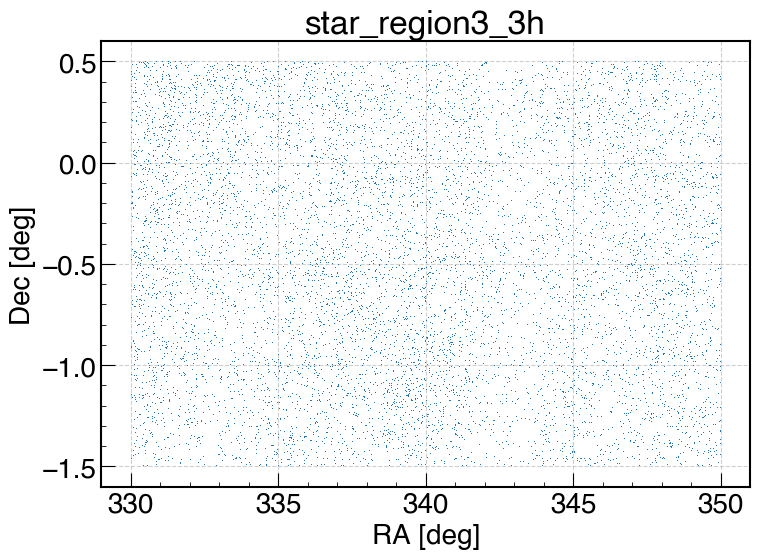

In [26]:
# region 3 of star data
t0 = time.time()

df_star = read_star_data(calib_data_dir, 3)
print(df_star.columns)

ra_star = df_star['ra']
dec_star = df_star['dec']
id_star = df_star['obj_id']
prob_star = df_star['probfstar']
iPS1 = df_star['iPS1']

t1 = time.time()
print(f'Time taken - read star data: {t1-t0:.2f} seconds')

# mask if there is any
# TO-DO: revise the ra, dec range later
msk =(iPS1>18) & (prob_star>0.5) & (ra_star>330) & (ra_star<350) & (dec_star>-1.5) & (dec_star<0.5)

# get the data table
data_table_star = get_data_table(id_star[msk], ra_star[msk], dec_star[msk], prefix='star', exptime=900.)

# add flux and proper motion columns
for coln in df_star.columns[4:]:
    print(coln)
    new_col = Column(df_star[coln][msk], dtype='float64', name=coln)
    data_table_star.add_column(new_col)

pmra_has_nan = np.isnan(data_table_star['pmra']).any()
pmdec_has_nan = np.isnan(data_table_star['pmdec']).any()
print(f'pmra has nan: {pmra_has_nan}, pmdec has nan: {pmdec_has_nan}')

# get the min and max of the pmra and pmdec
pmra_min = np.nanmin(data_table_star['pmra'])
pmra_max = np.nanmax(data_table_star['pmra'])
pmdec_min = np.nanmin(data_table_star['pmdec'])
pmdec_max = np.nanmax(data_table_star['pmdec'])
print(f'pmra: {pmra_min} - {pmra_max}, pmdec: {pmdec_min} - {pmdec_max}')

# set the NaN values of pmra and pmdec to 0.00000001
data_table_star['pmra'][np.isnan(data_table_star['pmra'])] = 0.00000001
data_table_star['pmdec'][np.isnan(data_table_star['pmdec'])] = 0.00000001


t2 = time.time()
print(f'Time taken - get star table: {t2-t1:.2f} seconds')

# write the data
write_data(data_table_star, prefix=f'star_region3_3h', fmt='fits', output_dir='../data_proc/test/')
write_data(data_table_star, prefix=f'star_region3_3h', fmt='ecsv', output_dir='../data_proc/test/')

t3= time.time()
print(f'Time taken - save star table: {t3-t2:.2f} seconds')

# plot the data
plot_radec(data_table_star, title="star_region3_3h", output_dir='../output/figures/')

epoch of star is  [2016.]


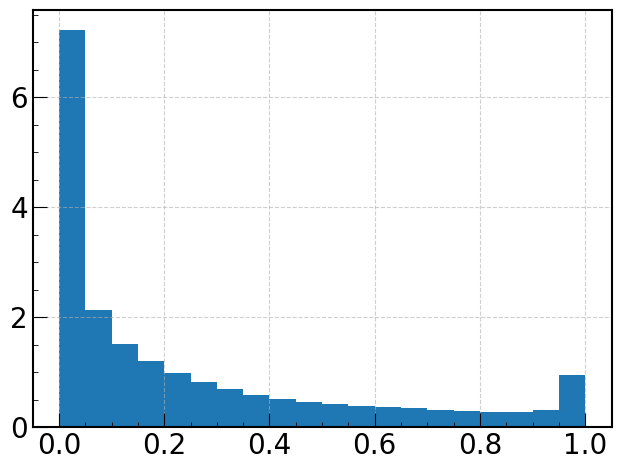

In [11]:
# check the data
print("epoch of star is ", np.unique(df_star['epoch']))
plt.hist(df_star['probfstar'], bins=20, density=True)
plt.show()
plt.close()

# Jan25

In [3]:
# TO-DO: revise the previous section to add more columns to the data table
# taken from Shitaro's code
ra_range_a, dec_range_a = [34.8, 38.2], [-6.2, -2.8]
ra_range_b, dec_range_b = [36.3, 39.7], [-1.2, 2.2]
ra_range_e, dec_range_e = [128.3, 133.4], [-1.1, 2.3]

## sky

### Jan20 updated calibration list

/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/field_a_sky.csv
Index(['sky_id', 'obj_id', 'ra', 'dec', 'epoch', 'tract', 'patch',
       'target_type_id', 'input_catalog_id', 'version'],
      dtype='object')
35.000007<ra<37.899999, -6.001784<dec<-3.000169.
fielda: 34.800000<ra<38.200000, -6.200000<dec<-2.800000.


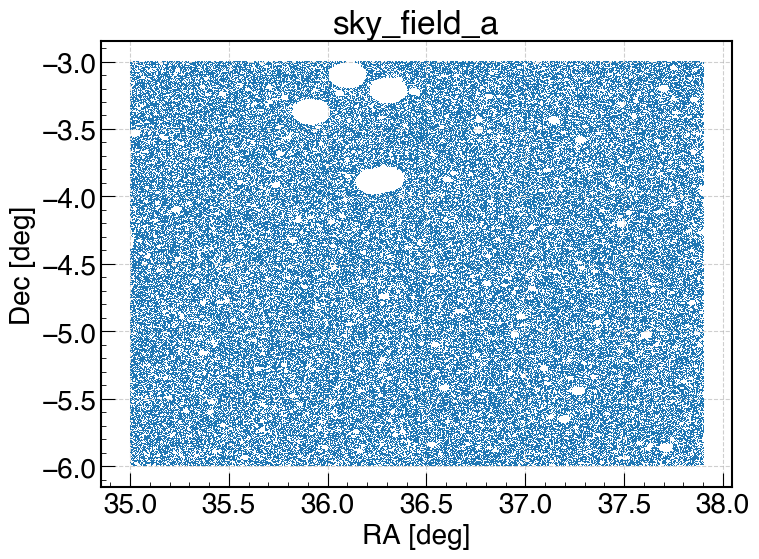

Time taken - read sky data: 6.36 seconds
/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/field_b_sky.csv
Index(['sky_id', 'obj_id', 'ra', 'dec', 'epoch', 'tract', 'patch',
       'target_type_id', 'input_catalog_id', 'version'],
      dtype='object')
36.500001<ra<39.499997, -1.000324<dec<2.000654.
fieldb: 36.300000<ra<39.700000, -1.200000<dec<2.200000.


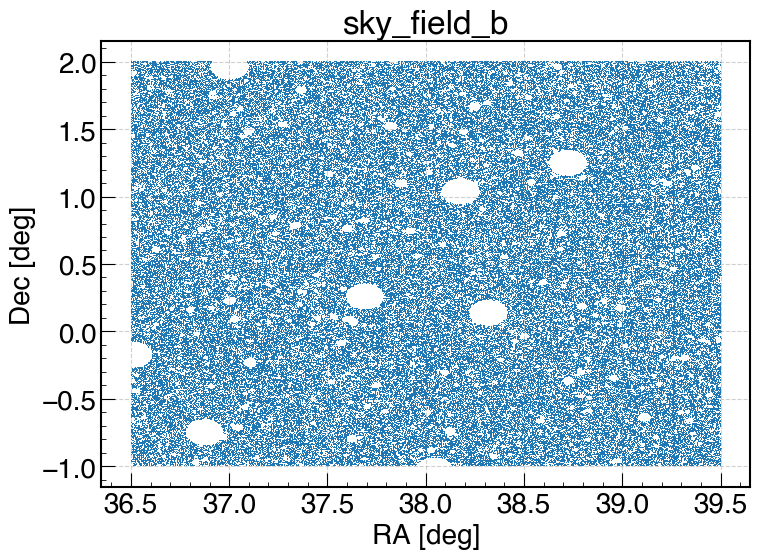

Time taken - read sky data: 6.33 seconds
/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/field_e_sky.csv
Index(['sky_id', 'obj_id', 'ra', 'dec', 'epoch', 'tract', 'patch',
       'target_type_id', 'input_catalog_id', 'version'],
      dtype='object')
128.000036<ra<133.499981, -1.001122<dec<2.102387.
fielde: 128.300000<ra<133.400000, -1.100000<dec<2.300000.


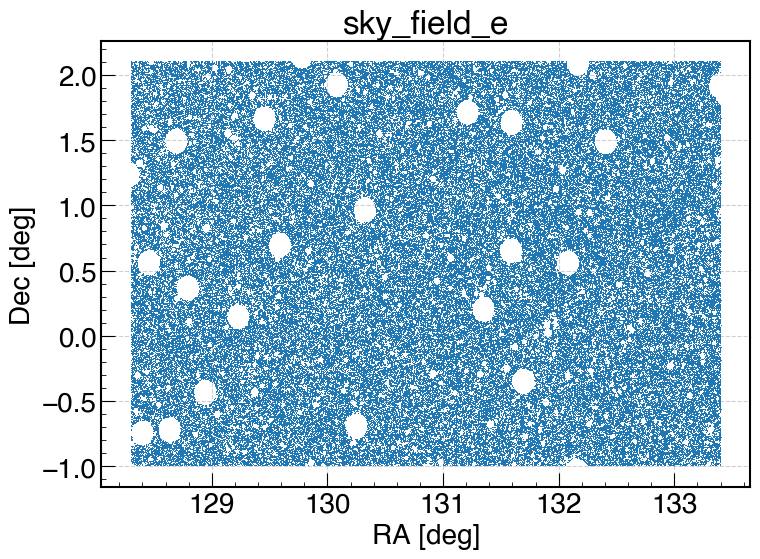

Time taken - read sky data: 8.43 seconds


In [9]:
# TO-DO: revise the ra, dec region selection code
data_dir = '/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/'
for field, ra_range, dec_range in zip(['a', 'b', 'e'], [ra_range_a, ra_range_b, ra_range_e], [dec_range_a, dec_range_b, dec_range_e]):
    t0 = time.time()

    fn = data_dir + f'field_{field}_sky.csv'
    print(fn)
    df_sky = pd.read_csv(fn) 
    print(df_sky.columns)
    
    # TO-DO: make sure sky_id is unique among all datasets
    id_sky = df_sky['sky_id']
    ra_sky = df_sky['ra']
    dec_sky = df_sky['dec']

    # print the ra, dec range
    print("%f<ra<%f, %f<dec<%f." % (np.min(ra_sky), np.max(ra_sky), np.min(dec_sky), np.max(dec_sky)))
    print("field%s: %f<ra<%f, %f<dec<%f." % (field, ra_range[0], ra_range[1], dec_range[0], dec_range[1]))
    msk = (ra_sky > ra_range[0]) & (ra_sky < ra_range[1]) & (dec_sky > dec_range[0]) & (dec_sky < dec_range[1])

    # get the data table
    data_table_sky = get_data_table(id_sky[msk], ra_sky[msk], dec_sky[msk], prefix='sky', exptime=1800.)

    # add more columns
    '''
    Index(['sky_id', 'obj_id', 'obj_id_orig', 'ra', 'dec', 'epoch', 'tract',
    'patch', 'target_type_id', 'input_catalog_id', 'mag_thresh', 'version',
    'created_at', 'updated_at'],
    dtype='object')
    '''
    # add flux and proper motion columns
    for coln, coln_new in zip(['obj_id', 'epoch', 'input_catalog_id'], ['obj_id', 'epoch', 'catId']):
        new_col = Column(df_sky[coln][msk], dtype=df_sky[coln].dtype, name=coln_new)
        data_table_sky.add_column(new_col)

    # write the data
    write_data(data_table_sky, prefix=f'sky_field_{field}', fmt='ecsv', output_dir='../data_proc/Jan25/')
        
    plot_radec(data_table_sky, title="sky_field_{}".format(field), output_dir='../output/Jan25/')    
    
    t1 = time.time()
    print(f'Time taken - read sky data: {t1-t0:.2f} seconds')


### calibration target list obtained in 2023

Index(['sky_id', 'obj_id', 'obj_id_orig', 'ra', 'dec', 'epoch', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'mag_thresh', 'version',
       'created_at', 'updated_at'],
      dtype='object')
126.536998<ra<146.536993, -3.317217<dec<6.444507.
fielde: 128.300000<ra<133.400000, -1.100000<dec<2.300000.


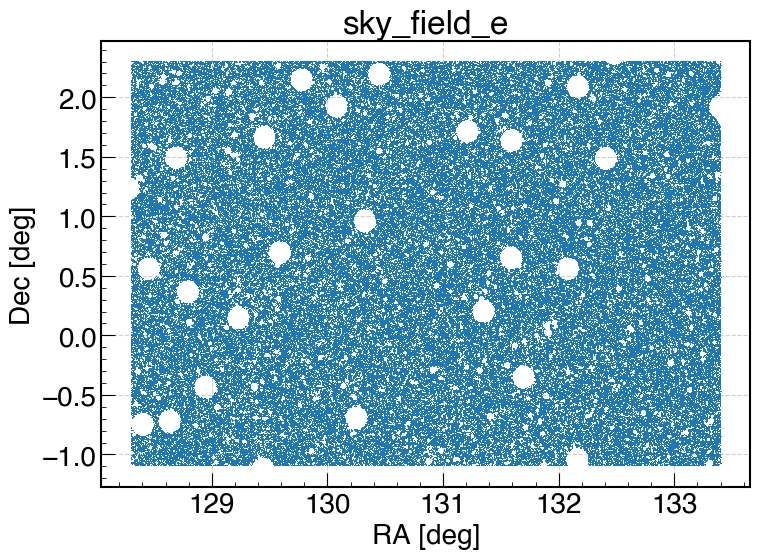

Time taken - read sky data: 12.26 seconds


In [59]:
# TO-DO: revise the ra, dec region selection code
for field, ra_range, dec_range in zip(['e', ], [ra_range_e, ], [dec_range_e, ]):
    id_sky_test = np.array([])
    ra_sky_test = np.array([])
    dec_sky_test = np.array([])

    # 
    t0 = time.time()

    # note for a, b, it's read_sky_data(calib_data_dir, 3, i) for i in range(4)[3:]
    for i in range(4)[:1]:
        df_sky = read_sky_data(calib_data_dir, 1, i)
        print(df_sky.columns)
        
        # TO-DO: make sure sky_id is unique among all datasets
        id_sky = df_sky['sky_id']
        ra_sky = df_sky['ra']
        dec_sky = df_sky['dec']

        # print the ra, dec range
        print("%f<ra<%f, %f<dec<%f." % (np.min(ra_sky), np.max(ra_sky), np.min(dec_sky), np.max(dec_sky)))
        print("field%s: %f<ra<%f, %f<dec<%f." % (field, ra_range[0], ra_range[1], dec_range[0], dec_range[1]))
        msk = (ra_sky > ra_range[0]) & (ra_sky < ra_range[1]) & (dec_sky > dec_range[0]) & (dec_sky < dec_range[1])

        # get the data table
        data_table_sky = get_data_table(id_sky[msk], ra_sky[msk], dec_sky[msk], prefix='sky', exptime=1800.)

        # add more columns
        '''
        Index(['sky_id', 'obj_id', 'obj_id_orig', 'ra', 'dec', 'epoch', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'mag_thresh', 'version',
       'created_at', 'updated_at'],
        dtype='object')
        '''
        # add flux and proper motion columns
        for coln, coln_new in zip(['epoch', 'input_catalog_id'], ['epoch', 'catId']):
            new_col = Column(df_sky[coln][msk], dtype=df_sky[coln].dtype, name=coln_new)
            data_table_sky.add_column(new_col)

        # write the data
        write_data(data_table_sky, prefix=f'sky_field_{field}', fmt='ecsv', output_dir='../data_proc/Jan25/')
        
        # plot the data
        ax.plot(ra_sky[msk], dec_sky[msk], ",", alpha=1., ls='none')

    plot_radec(data_table_sky, title="sky_field_{}".format(field), output_dir='../output/Jan25/')    
    
    t1 = time.time()
    print(f'Time taken - read sky data: {t1-t0:.2f} seconds')


## star

### Jan20 updated

/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/field_a_fluxstd.csv
Index(['fluxstd_id', 'obj_id', 'ra', 'dec', 'epoch', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'psf_mag_g', 'filter_g',
       'psf_flux_g', 'psf_flux_error_g', 'filter_r', 'psf_flux_r',
       'psf_flux_error_r', 'filter_i', 'psf_flux_i', 'psf_flux_error_i',
       'filter_z', 'psf_flux_z', 'psf_flux_error_z', 'filter_y', 'psf_flux_y',
       'psf_flux_error_y', 'filter_j', 'psf_flux_j', 'psf_flux_error_j',
       'prob_f_star', 'teff_brutus', 'teff_brutus_low', 'teff_brutus_high',
       'logg_brutus', 'logg_brutus_low', 'logg_brutus_high', 'teff_gspphot',
       'teff_gspphot_lower', 'teff_gspphot_upper', 'is_fstar_gaia', 'version'],
      dtype='object')
35.000085<ra<37.899851, -6.001543<dec<-3.001379.
fielda: 34.800000<ra<38.200000, -6.200000<dec<-2.800000.
Time taken - read star data: 

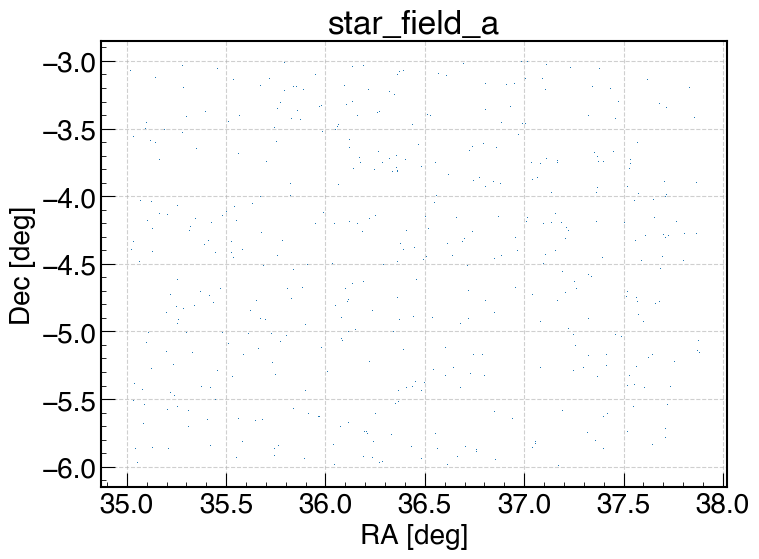

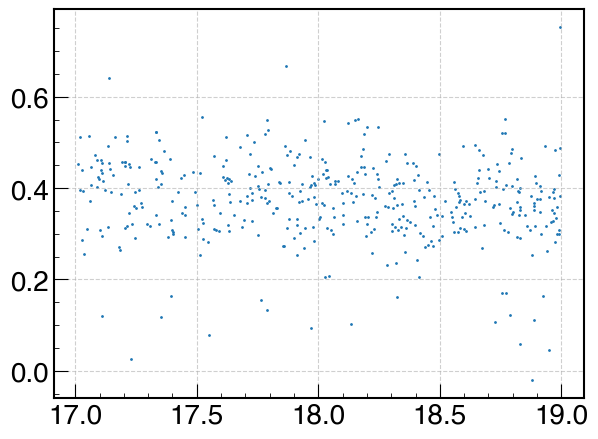

/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/field_b_fluxstd.csv
Index(['fluxstd_id', 'obj_id', 'ra', 'dec', 'epoch', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'psf_mag_g', 'filter_g',
       'psf_flux_g', 'psf_flux_error_g', 'filter_r', 'psf_flux_r',
       'psf_flux_error_r', 'filter_i', 'psf_flux_i', 'psf_flux_error_i',
       'filter_z', 'psf_flux_z', 'psf_flux_error_z', 'filter_y', 'psf_flux_y',
       'psf_flux_error_y', 'filter_j', 'psf_flux_j', 'psf_flux_error_j',
       'prob_f_star', 'teff_brutus', 'teff_brutus_low', 'teff_brutus_high',
       'logg_brutus', 'logg_brutus_low', 'logg_brutus_high', 'teff_gspphot',
       'teff_gspphot_lower', 'teff_gspphot_upper', 'is_fstar_gaia', 'version'],
      dtype='object')
36.500325<ra<39.499731, -0.999867<dec<2.000284.
fieldb: 36.300000<ra<39.700000, -1.200000<dec<2.200000.
Time taken - read star data: 2.

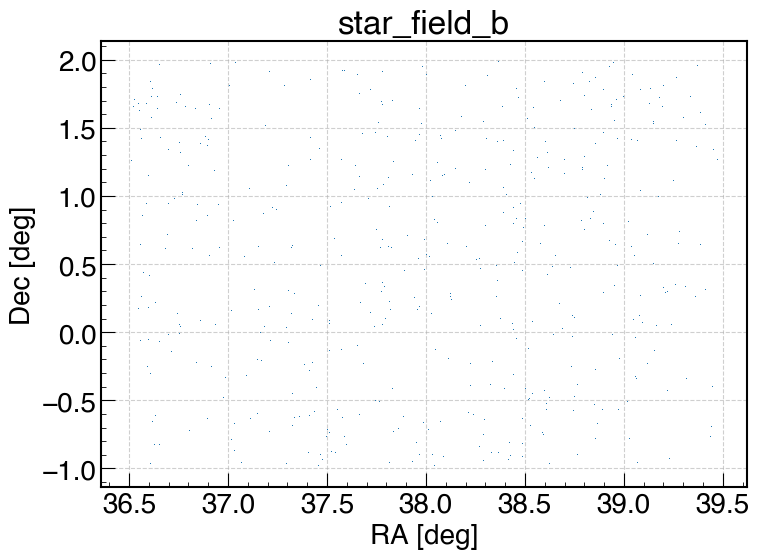

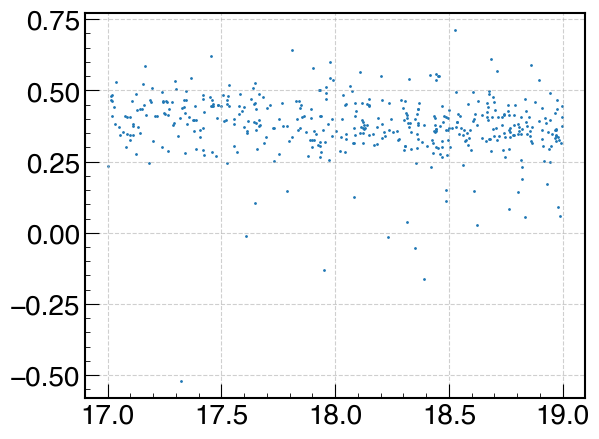

/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/field_e_fluxstd.csv
Index(['fluxstd_id', 'obj_id', 'ra', 'dec', 'epoch', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'psf_mag_g', 'filter_g',
       'psf_flux_g', 'psf_flux_error_g', 'filter_r', 'psf_flux_r',
       'psf_flux_error_r', 'filter_i', 'psf_flux_i', 'psf_flux_error_i',
       'filter_z', 'psf_flux_z', 'psf_flux_error_z', 'filter_y', 'psf_flux_y',
       'psf_flux_error_y', 'filter_j', 'psf_flux_j', 'psf_flux_error_j',
       'prob_f_star', 'teff_brutus', 'teff_brutus_low', 'teff_brutus_high',
       'logg_brutus', 'logg_brutus_low', 'logg_brutus_high', 'teff_gspphot',
       'teff_gspphot_lower', 'teff_gspphot_upper', 'is_fstar_gaia', 'version'],
      dtype='object')
128.000013<ra<133.499908, -1.000698<dec<2.101901.
fielde: 128.300000<ra<133.400000, -1.100000<dec<2.300000.
Time taken - read star data

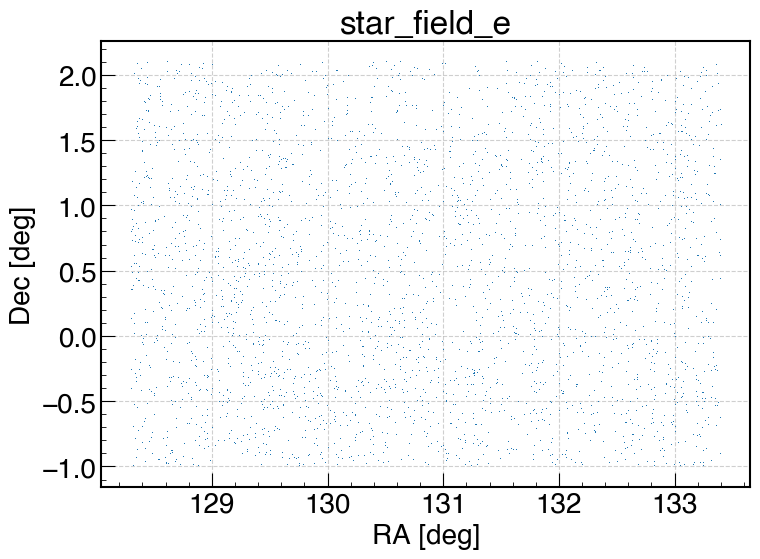

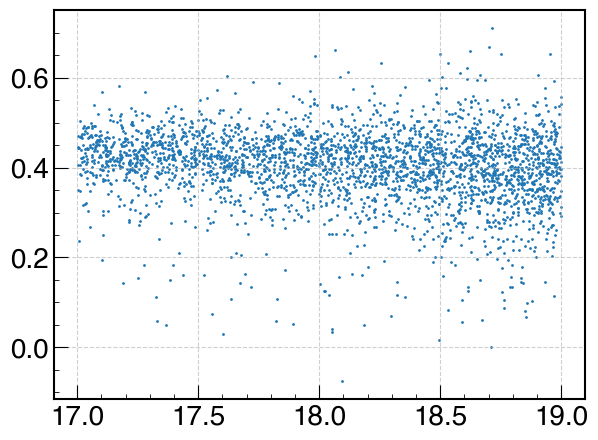

In [18]:
# TO-DO: revise the ra, dec region selection code
t0 = time.time()
data_dir = '/Users/jing/My_Work/Ongoing/PFS_CO_Repo/pfs_co_fa/data_raw/Jan25/calib_co/'
for field, ra_range, dec_range in zip(['a', 'b', 'e'], [ra_range_a, ra_range_b, ra_range_e], [dec_range_a, dec_range_b, dec_range_e]):
    fn = data_dir + f'field_{field}_fluxstd.csv'
    print(fn)
    df_star = pd.read_csv(fn) 
    print(df_star.columns)

    id_star = df_star['obj_id']
    ra_star = df_star['ra']
    dec_star = df_star['dec']
    prob_star = df_star['prob_f_star']
    gmag = df_star['psf_mag_g']
    imag_ab = -2.5*np.log10(df_star['psf_flux_i']*1e-9/3631.)   


    # print the ra, dec range
    print("%f<ra<%f, %f<dec<%f." % (np.min(ra_star), np.max(ra_star), np.min(dec_star), np.max(dec_star)))
    print("field%s: %f<ra<%f, %f<dec<%f." % (field, ra_range[0], ra_range[1], dec_range[0], dec_range[1]))
    msk = (ra_star > ra_range[0]) & (ra_star < ra_range[1]) & (dec_star > dec_range[0]) & (dec_star < dec_range[1])

    t1 = time.time()
    print(f'Time taken - read star data: {t1-t0:.2f} seconds')

    # mask if there is any
    # TO-DO: revise the ra, dec range later
    msk = (gmag<19) & (gmag>17.) & (prob_star>0.5) & (ra_star>ra_range[0]) & (ra_star<ra_range[1]) & (dec_star>dec_range[0]) & (dec_star<dec_range[1])
    print(f'Number of stars in field {field}: {np.sum(msk)}')

    # get the data table
    data_table_star = get_data_table(id_star[msk], ra_star[msk], dec_star[msk], prefix='star', exptime=1800.)

    # add flux and proper motion columns
    for coln in df_star.columns[4:]:
        new_col = Column(df_star[coln][msk], dtype=df_star[coln].dtype, name=coln)
        data_table_star.add_column(new_col)
    # add one column named 'catId' of 32-bit integer type with value of 4 (GaiaDR3)
    new_col = Column(np.zeros(np.sum(msk), dtype='int32') + 4, name='catId')
    data_table_star.add_column(new_col)

    pmra_has_nan = np.isnan(data_table_star['pmra']).any()
    pmdec_has_nan = np.isnan(data_table_star['pmdec']).any()
    print(f'pmra has nan: {pmra_has_nan}, pmdec has nan: {pmdec_has_nan}')

    parallax_has_nan = np.isnan(data_table_star['parallax']).any()
    print(f'parallax has nan: {parallax_has_nan}.')

    # get the min and max of the pmra and pmdec
    pmra_min = np.nanmin(data_table_star['pmra'])
    pmra_max = np.nanmax(data_table_star['pmra'])
    pmdec_min = np.nanmin(data_table_star['pmdec'])
    pmdec_max = np.nanmax(data_table_star['pmdec'])
    print(f'pmra: {pmra_min} - {pmra_max}, pmdec: {pmdec_min} - {pmdec_max}')

    # set the NaN values of pmra and pmdec to 0.0
    data_table_star['pmra'][np.isnan(data_table_star['pmra'])] = 0.0
    data_table_star['pmdec'][np.isnan(data_table_star['pmdec'])] = 0.0
    data_table_star['parallax'][np.isnan(data_table_star['parallax'])] = 1e-7


    t2 = time.time()
    print(f'Time taken - get star table: {t2-t1:.2f} seconds')

    # write the data
    write_data(data_table_star, prefix=f'star_field_{field}', fmt='ecsv', output_dir='../data_proc/Jan25/')

    t3= time.time()
    print(f'Time taken - save star table: {t3-t2:.2f} seconds')

    # plot the data
    plot_radec(data_table_star, title="star_field_{}".format(field), output_dir='../output/Jan25/')

    plt.scatter(gmag[msk], gmag[msk]-imag_ab[msk], s=1)
    plt.show()
    plt.close()


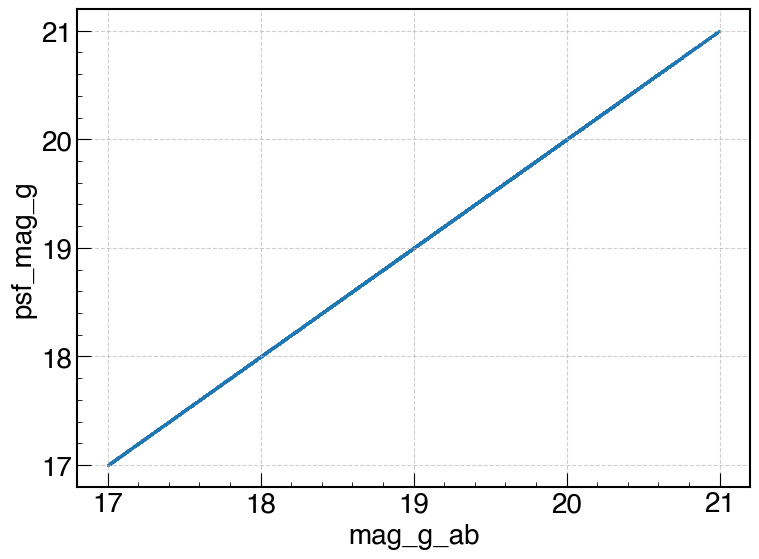

In [14]:
mag_g_ab = -2.5*np.log10(df_star['psf_flux_g']*1e-9/3631.)   
plt.figure(figsize=(8, 6))
plt.scatter(mag_g_ab[msk], df_star['psf_mag_g'][msk], s=1)
plt.xlabel('mag_g_ab')
plt.ylabel('psf_mag_g')
plt.show()
plt.close() 

### calibration target list obtained in 2023

/Users/jing/My_Work/Ongoing/NetFlow_PFS_Cosmo/Data//sky_star_data/region1_probfstar.csv
Index(['obj_id', 'catalog', 'ra', 'dec', 'epoch', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'gPS1', 'rPS1', 'iPS1',
       'zPS1', 'yPS1', 'gFluxJy', 'rFluxJy', 'iFluxJy', 'zFluxJy', 'yFluxJy',
       'gFluxJy_err', 'rFluxJy_err', 'iFluxJy_err', 'zFluxJy_err',
       'yFluxJy_err', 'flags_dist', 'flags_ebv', 'probfstar'],
      dtype='object')
Time taken - read star data: 17.35 seconds
Number of stars in field e: 6163
pmra has nan: True, pmdec has nan: True
parallax has nan: True.
pmra: -51.20076661213487 - 78.95643059340901, pmdec: -81.7568445601242 - 37.09759563572168
Time taken - get star table: 0.23 seconds
Time taken - save star table: 0.60 seconds


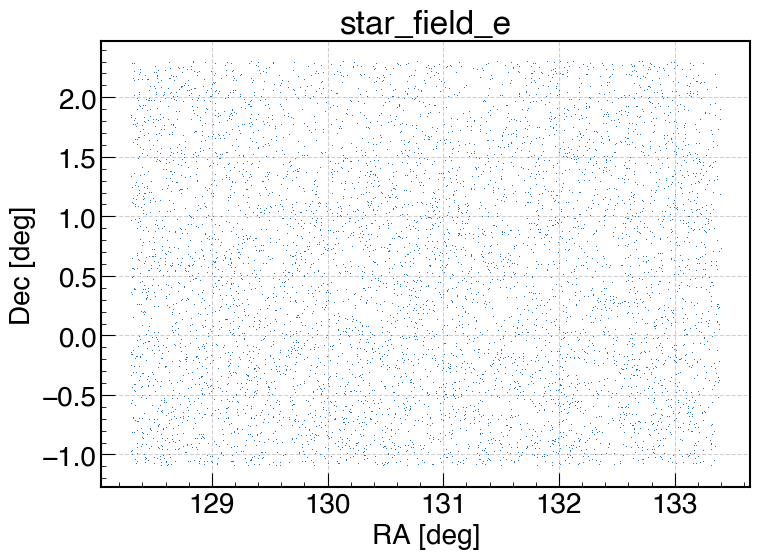

In [65]:
for field, ra_range, dec_range in zip(['e', ], [ra_range_e, ], [dec_range_e, ]):
    id_star_test = np.array([])
    ra_star_test = np.array([])
    dec_star_test = np.array([])

    # 
    t0 = time.time()

    # note for a, b, it's read_sky_data(calib_data_dir, 3) 
    df_star = read_star_data(calib_data_dir, 1)
    print(df_star.columns)

    ra_star = df_star['ra']
    dec_star = df_star['dec']
    id_star = df_star['obj_id']
    prob_star = df_star['probfstar']
    iPS1 = df_star['iPS1']

    t1 = time.time()
    print(f'Time taken - read star data: {t1-t0:.2f} seconds')

    # mask if there is any
    # TO-DO: revise the ra, dec range later
    msk =(iPS1>18) & (prob_star>0.5) & (ra_star>ra_range[0]) & (ra_star<ra_range[1]) & (dec_star>dec_range[0]) & (dec_star<dec_range[1])
    print(f'Number of stars in field {field}: {np.sum(msk)}')

    # get the data table
    data_table_star = get_data_table(id_star[msk], ra_star[msk], dec_star[msk], prefix='star', exptime=1800.)

    # add flux and proper motion columns
    for coln in df_star.columns[4:]:
        new_col = Column(df_star[coln][msk], dtype=df_star[coln].dtype, name=coln)
        data_table_star.add_column(new_col)
    # add one column named 'catId' of 32-bit integer type with value of 4 (GaiaDR3)
    new_col = Column(np.zeros(np.sum(msk), dtype='int32') + 4, name='catId')
    data_table_star.add_column(new_col)

    pmra_has_nan = np.isnan(data_table_star['pmra']).any()
    pmdec_has_nan = np.isnan(data_table_star['pmdec']).any()
    print(f'pmra has nan: {pmra_has_nan}, pmdec has nan: {pmdec_has_nan}')

    parallax_has_nan = np.isnan(data_table_star['parallax']).any()
    print(f'parallax has nan: {parallax_has_nan}.')

    # get the min and max of the pmra and pmdec
    pmra_min = np.nanmin(data_table_star['pmra'])
    pmra_max = np.nanmax(data_table_star['pmra'])
    pmdec_min = np.nanmin(data_table_star['pmdec'])
    pmdec_max = np.nanmax(data_table_star['pmdec'])
    print(f'pmra: {pmra_min} - {pmra_max}, pmdec: {pmdec_min} - {pmdec_max}')

    # set the NaN values of pmra and pmdec to 0.0
    data_table_star['pmra'][np.isnan(data_table_star['pmra'])] = 0.0
    data_table_star['pmdec'][np.isnan(data_table_star['pmdec'])] = 0.0
    data_table_star['parallax'][np.isnan(data_table_star['parallax'])] = 1e-7


    t2 = time.time()
    print(f'Time taken - get star table: {t2-t1:.2f} seconds')

    # write the data
    write_data(data_table_star, prefix=f'star_field_{field}', fmt='ecsv', output_dir='../data_proc/Jan25/')

    t3= time.time()
    print(f'Time taken - save star table: {t3-t2:.2f} seconds')

    # plot the data
    plot_radec(data_table_star, title="star_field_{}".format(field), output_dir='../output/Jan25/')